# Dataset Preprocessing

By Steven S. Sison on December 16, 2023

## Description

This document will contain the necessary processes for aggregating the datasets obtained online. For each dataset, the data will be cleaned such that some columns will be dropped and the missing values will be handled. The final output of this document will be the finalized dataset for the project containing two columns: url and type.
- URL: The actual URL.
- Type: If the URL is clean, the type will be benign. Otherwise, the type will be based on its attack type (phishing, spam, malware, defacement).

### Some Preliminary Codes

In [2]:
import pandas as pd                     # For data transformation
import numpy as numpy                   # For scientific calculations
import seaborn as sns                   # For data visualizations
import matplotlib.pyplot as plt         # For plotting
import plotly.graph_objects as go       # For plotting

'''
Steps:
1. Import the Each Dataset
2. Drop unnecessary columns
3. Merge the datasets
4. Check for:
    a. Null or Missing Values
    b. Duplicate Values
5. Export the final dataset 
'''

'\nSteps:\n1. Import the Each Dataset\n2. Drop unnecessary columns\n3. Merge the datasets\n4. Check for:\n    a. Null or Missing Values\n    b. Duplicate Values\n5. Export the final dataset \n'

## Dataset 1: ISCX URL Dataset

In [3]:
dataset_1 = pd.read_csv("ISCX-URL2016.csv")         # Imports the dataset from ISCX-URL2016
dataset_1.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [4]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [5]:
dataset_1['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

## Dataset 2: Phishtank

In [6]:
dataset_2 = pd.read_csv("phishtank.csv")            # Imports the dataset from PhishTank
dataset_2.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8395498,https://47.76.164.252/,http://www.phishtank.com/phish_detail.php?phis...,2023-12-16T09:54:39+00:00,yes,2023-12-16T10:04:07+00:00,yes,Other
1,8395495,https://paylah.dbsbanksecure.digital/,http://www.phishtank.com/phish_detail.php?phis...,2023-12-16T09:37:00+00:00,yes,2023-12-16T09:43:20+00:00,yes,Other
2,8395487,https://pub-6d663fb85dd14d5eb780578314065a6f.r...,http://www.phishtank.com/phish_detail.php?phis...,2023-12-16T09:02:56+00:00,yes,2023-12-16T09:09:40+00:00,yes,Other
3,8395486,https://pub-12593f612a3248be91e520847ebf8634.r...,http://www.phishtank.com/phish_detail.php?phis...,2023-12-16T09:02:51+00:00,yes,2023-12-16T09:09:40+00:00,yes,Other
4,8395485,https://confirmacoesfit.online/,http://www.phishtank.com/phish_detail.php?phis...,2023-12-16T09:02:06+00:00,yes,2023-12-16T09:09:40+00:00,yes,Other


In [7]:
dataset_2["type"] = "phishing"                     # Adds the type column
dataset_2 = dataset_2[['url', 'type']] 
dataset_2.head()

,url,type
0,https://47.76.164.252/,phishing
1,https://paylah.dbsbanksecure.digital/,phishing
2,https://pub-6d663fb85dd14d5eb780578314065a6f.r...,phishing
3,https://pub-12593f612a3248be91e520847ebf8634.r...,phishing
4,https://confirmacoesfit.online/,phishing


In [8]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40074 entries, 0 to 40073
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     40074 non-null  object
 1   type    40074 non-null  object
dtypes: object(2)
memory usage: 626.3+ KB


In [9]:
dataset_2['type'].value_counts()

type
phishing    40074
Name: count, dtype: int64

## Dataset 3: URLHaus

In [10]:
dataset_3 = pd.read_csv("urlhaus.csv")                  # Imports the dataset from URLHaus
dataset_3.head()

,id,dateadded,url,url_status,last_online,threat,tags,urlhaus_link,reporter
0,2741425,12/16/2023 10:05,http://200.69.57.16:32847/i,online,12/16/2023 10:25,malware_download,"32-bit,elf,mips,Mozi",https://urlhaus.abuse.ch/url/2741425/,geenensp
1,2741424,12/16/2023 9:36,http://200.69.57.16:32847/bin.sh,online,12/16/2023 10:34,malware_download,"32-bit,elf,mips,Mozi",https://urlhaus.abuse.ch/url/2741424/,geenensp
2,2741423,12/16/2023 9:32,http://123.173.89.140:42350/.i,online,12/16/2023 10:49,malware_download,hajime,https://urlhaus.abuse.ch/url/2741423/,geenensp
3,2741421,12/16/2023 8:42,http://39.174.238.80:63247/.i,online,12/16/2023 10:40,malware_download,hajime,https://urlhaus.abuse.ch/url/2741421/,misa11n
4,2741420,12/16/2023 8:42,http://222.246.126.37:21696/.i,online,12/16/2023 10:37,malware_download,hajime,https://urlhaus.abuse.ch/url/2741420/,misa11n


In [11]:
dataset_3['threat'].value_counts()

threat
malware_download    3063
Name: count, dtype: int64

In [12]:
dataset_3 = dataset_3[['url']]                          # Drops unnecessary columns
dataset_3['type'] = "malware"                           # Adds a new column for the type
dataset_3.head()

,url,type
0,http://200.69.57.16:32847/i,malware
1,http://200.69.57.16:32847/bin.sh,malware
2,http://123.173.89.140:42350/.i,malware
3,http://39.174.238.80:63247/.i,malware
4,http://222.246.126.37:21696/.i,malware


In [13]:
dataset_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     3063 non-null   object
 1   type    3063 non-null   object
dtypes: object(2)
memory usage: 48.0+ KB


In [14]:
dataset_3['type'].value_counts()

type
malware    3063
Name: count, dtype: int64

## Merging the Datasets

In [15]:
final_unbalanced = pd.concat([dataset_1, dataset_2, dataset_3])        # Merges all of the datasets
final_unbalanced.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [16]:
final_unbalanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694328 entries, 0 to 3062
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     694328 non-null  object
 1   type    694328 non-null  object
dtypes: object(2)
memory usage: 15.9+ MB


In [17]:
final_unbalanced['type'].value_counts()

type
benign        428103
phishing      134185
defacement     96457
malware        35583
Name: count, dtype: int64

In [18]:
final_unbalanced.isna().sum()

url     0
type    0
dtype: int64

In [19]:
final_unbalanced.isnull().sum()

url     0
type    0
dtype: int64

In [20]:
final_unbalanced.duplicated().sum()

10146

In [21]:
final_unbalanced.drop_duplicates(inplace=True)
final_unbalanced.duplicated().sum()

0

In [22]:
final_unbalanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684182 entries, 0 to 3062
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     684182 non-null  object
 1   type    684182 non-null  object
dtypes: object(2)
memory usage: 15.7+ MB


In [23]:
final_unbalanced['type'].value_counts()

type
benign        428080
phishing      134094
defacement     95308
malware        26700
Name: count, dtype: int64

C:\Users\sison\AppData\Local\Temp\ipykernel_3896\1810689993.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


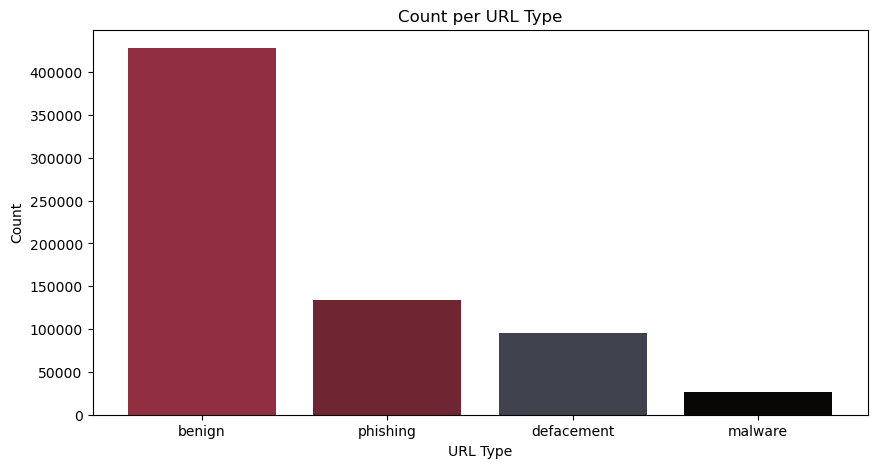

In [31]:
fig = plt.figure(figsize=(10,5))

plt.bar(url_type, url_type_count, color=['#912F40','#702632','#40434E','#080705'])
plt.xlabel("URL Type")
plt.ylabel("Count")
plt.title("Count per URL Type")

fig.show()

<Figure size 1000x500 with 0 Axes>

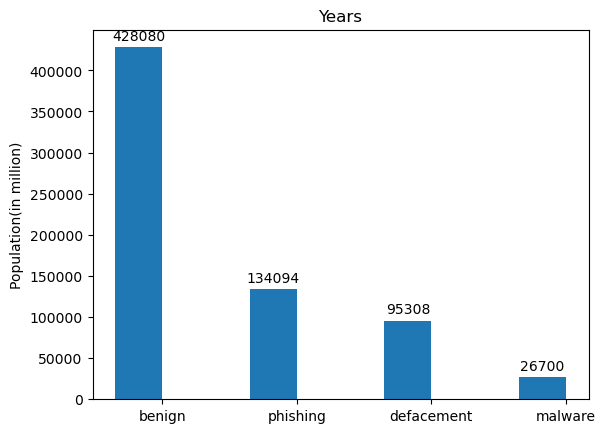

In [32]:
import numpy as np

fig = plt.figure(figsize=(10,5))

url_type = final_unbalanced['type'].value_counts().index
url_type_count = final_unbalanced['type'].value_counts()

x = np.arange(len(url_type)) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()

ax.set_ylabel('Population(in million)')
ax.set_title('Years')
ax.set_xticks(x)
ax.set_xticklabels(url_type)

pps = ax.bar(x - width/2, url_type_count, width, label='population')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

In [ ]:
final_unbalanced.to_csv("final_unbalanced_noFeatures.csv", encoding='utf-8', index=False)
final_unbalanced.to_csv("../02_feature-engineering/final_unbalanced_noFeatures.csv", encoding='utf-8', index=False)